In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

In [2]:
# Load Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

df = pd.read_csv(url, sep=r'\s+', header=None,  names=column_names, na_values='?')

In [3]:
continuous_cols = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']
df_continuous = df[continuous_cols]
df_filled = df_continuous.fillna(df_continuous.mean())

In [4]:
# Hierarchical Cluster
model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='average' )
cluster_labels = model.fit_predict(df_filled)

In [5]:
df['Cluster'] = cluster_labels
df_filled['Cluster'] = cluster_labels
df_filled['origin'] = df['origin']  
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,Cluster
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,2
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,2
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,2
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,2
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,2


In [6]:
print("\nHierarchical Cluster Stats:")
print(df_filled.groupby('Cluster')[continuous_cols].agg(['mean', 'var']))


Hierarchical Cluster Stats:
               mpg            displacement               horsepower  \
              mean        var         mean          var        mean   
Cluster                                                               
0        27.365414  41.976309   131.934211  2828.083391   84.300061   
1        13.889062   3.359085   358.093750  2138.213294  167.046875   
2        17.510294   8.829892   278.985294  2882.492318  124.470588   

                          weight                acceleration             
                var         mean            var         mean        var  
Cluster                                                                  
0        369.143491  2459.511278  182632.099872    16.298120   5.718298  
1        756.521577  4398.593750   74312.340278    13.025000   3.591429  
2        713.088674  3624.838235   37775.809263    15.105882  10.556980  


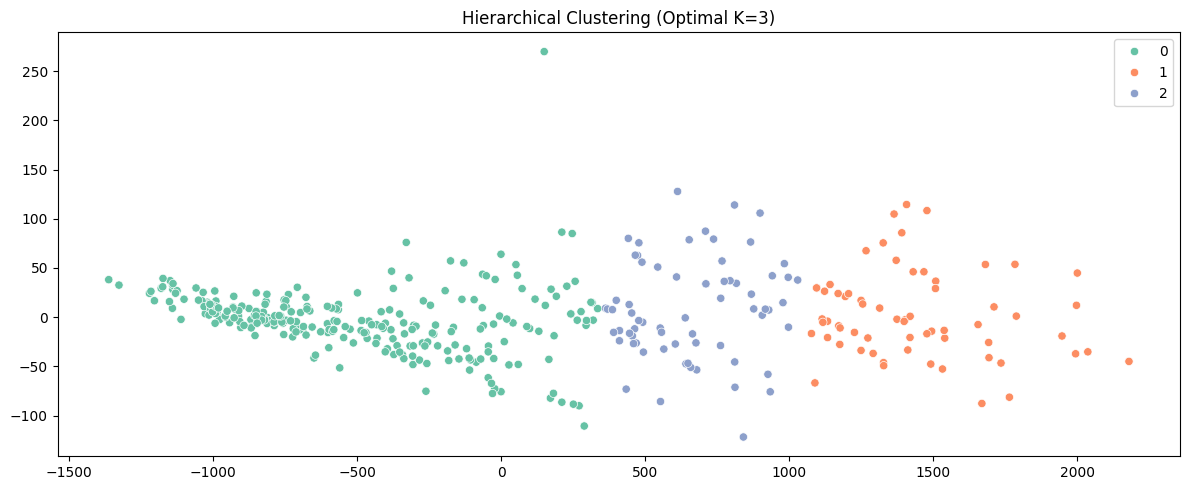

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_filled)

plt.figure(figsize=(12, 5))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=cluster_labels, palette='Set2')
plt.title('Hierarchical Clustering (Optimal K={})'.format(3))
plt.tight_layout()
plt.show()

In [8]:
print("\nHierarchical vs Origin:\n", pd.crosstab(df['origin'], df['Cluster']))


Hierarchical vs Origin:
 Cluster    0   1   2
origin              
1        120  64  65
2         67   0   3
3         79   0   0
